# EDA

In [1]:
# Your code here
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import json
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import f_classif, SelectKBest
from pickle import dump
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## 1.  Problem statement and data collection

Description of the problem: Predicting the cost of health insurance for a person

The important insurance company 4Geeks Insurance S.L. wants to calculate, based on the physiological data of its customers what will be the premium (cost) to be borne by each of them. To do this, it has assembled a whole team of doctors, and based on data from other companies and a particular study, it has managed to gather a set of data to train a predictive model.

In [2]:
df = pd.read_csv("../data/raw/medical_insurance_cost.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


1. age. Age of primary beneficiary (numeric)
2. sex. Gender of the primary beneficiary (categorical)
3. bmi. Body mass index (numeric)
4. children. Number of children/dependents covered by health insurance (numeric)
5. smoker. Is the person a smoker? (categorical)
6. region. Beneficiary's residential area in the U.S.: northeast, southeast, southwest, northwest (categorical)
7. charges. Health insurance premium (numerical)

## 2. Exploration and data cleaning 

### 2.1 Summarize DF

In [3]:
#Display the info
print(f'Total data Shape: {df.shape}')
print(df.info())

Total data Shape: (1338, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [4]:
df.isna().sum()[df.isna().sum()>0]

Series([], dtype: int64)

No Null values found.

### 2.2 Eliminate duplicates

In [5]:
#Check for duplicate rows
duplicates = df[df.duplicated()]
print(f'Total duplicate rows: {duplicates.shape[0]}')

Total duplicate rows: 1


In [6]:
duplicates.head() 

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [7]:
#Drop duplicate rows and keep the first occurrence
df = df.drop_duplicates()

#Confirm if duplicates are removed
print(f'Data shape after removing duplicates: {df.shape}')

Data shape after removing duplicates: (1337, 7)


### 2.3 Eliminate irrelevant information

## 3. Univariate Analysis 

In [8]:
#Separate categorical and numerical columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()

#Print the lists of columns
print("Categorical columns:", categorical_columns)
print("Numerical columns:", numerical_columns)

Categorical columns: ['sex', 'smoker', 'region']
Numerical columns: ['age', 'bmi', 'children', 'charges']


### 3.1 Categorical Variable Analysis 

In [9]:
#Display summary statistics for numerical columns
df[categorical_columns].describe()

,sex,smoker,region
count,1337,1337,1337
unique,2,2,4
top,male,no,southeast
freq,675,1063,364


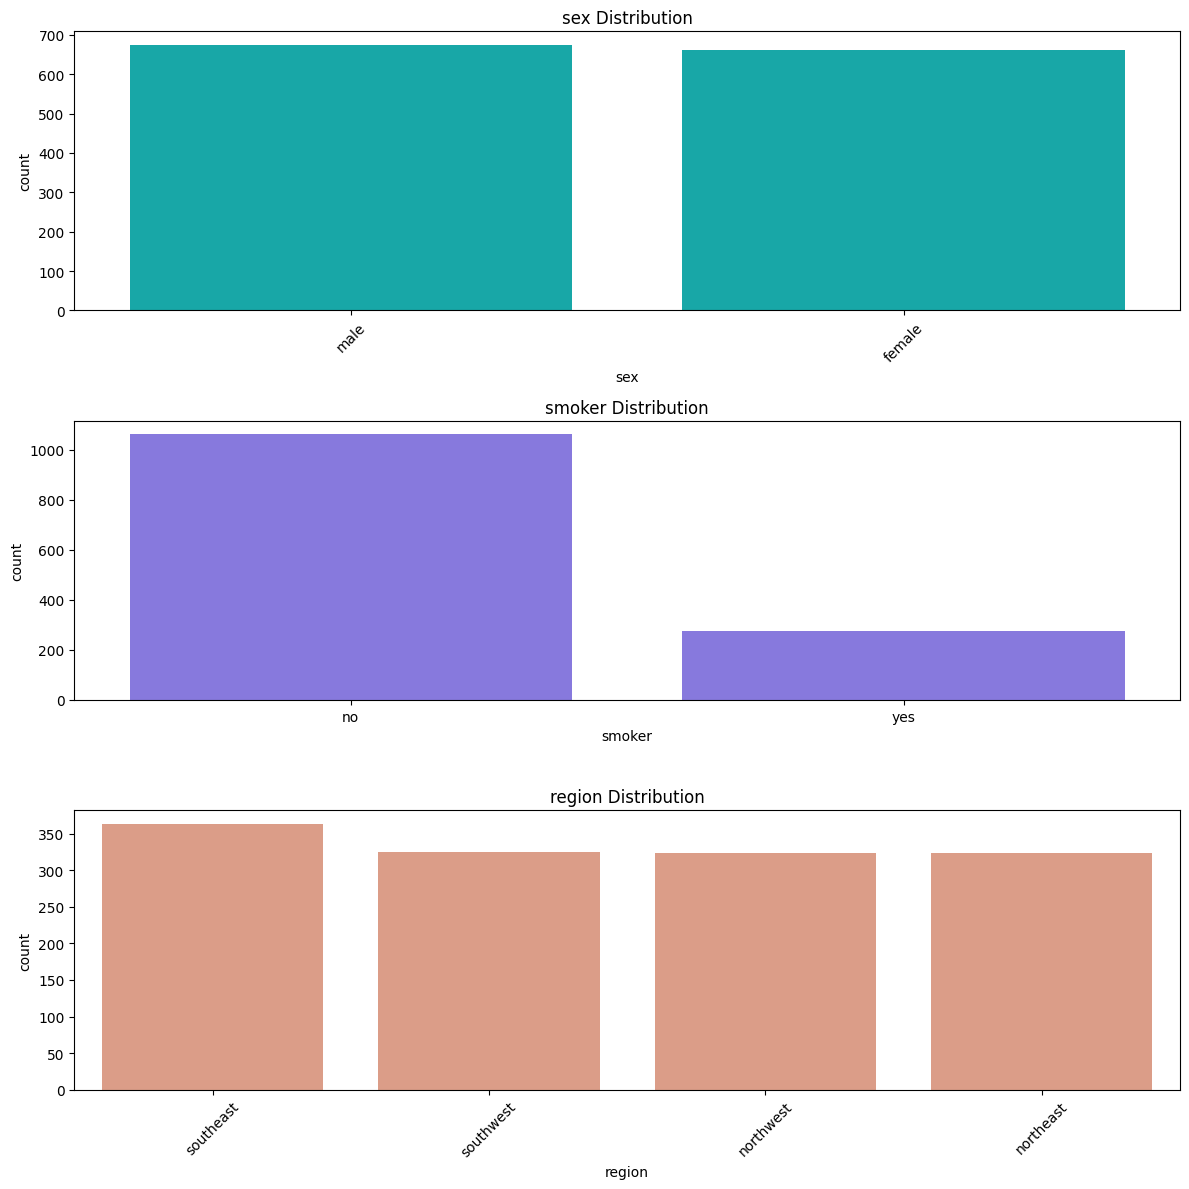

In [10]:
#Set up a figure with 3 subplots, one for each categorical variable
fig, ax = plt.subplots(3, 1, figsize=(12, 12))

#Plot "job" distribution
sns.countplot(ax=ax[0], data=df, x="sex", order=df['sex'].value_counts().index, color='c')
ax[0].set_title('sex Distribution')
ax[0].tick_params(axis='x', rotation=45)

#Plot "marital" distribution
sns.countplot(ax=ax[1], data=df, x="smoker", order=df['smoker'].value_counts().index, color='mediumslateblue')
ax[1].set_title('smoker Distribution')

#Plot "education" distribution
sns.countplot(ax=ax[2], data=df, x="region", order=df['region'].value_counts().index, color='darksalmon')
ax[2].set_title('region Distribution')
ax[2].tick_params(axis='x', rotation=45)

#Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

Conclusion:

Sex: The dataset has a higher number of male entries compared to female, but both genders are balanced.

Smoker: Most individuals in the dataset are non smokers.

Region: The Southeast region has the highest representation. The dataset has broad geographical coverage but with a slight emphasis on the Southeast.

### 3.2 Numerical Variable Analysis 

In [11]:
#Display summary statistics for numerical columns
df[numerical_columns].describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


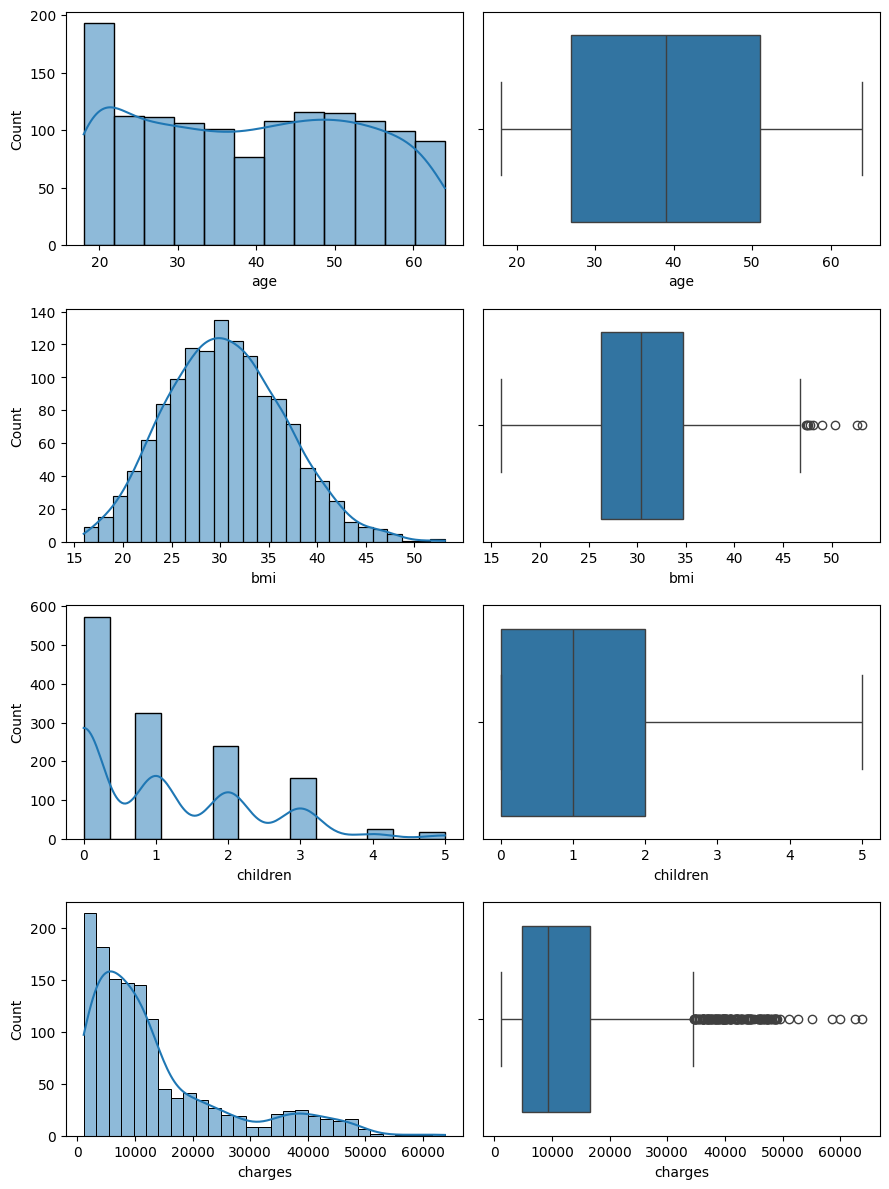

In [12]:
fig, ax = plt.subplots(4, 2, figsize=(9, 12))

#Age
sns.histplot(data=df, x='age', ax=ax[0, 0], kde=True)
sns.boxplot(data=df, x='age', ax=ax[0, 1])

#BMI
sns.histplot(data=df, x='bmi', ax=ax[1, 0], kde=True)
sns.boxplot(data=df, x='bmi', ax=ax[1, 1])

#Children
sns.histplot(data=df, x='children', ax=ax[2, 0], kde=True)
sns.boxplot(data=df, x='children', ax=ax[2, 1])

#Charges
sns.histplot(data=df, x='charges', ax=ax[3, 0], kde=True)
sns.boxplot(data=df, x='charges', ax=ax[3, 1])

plt.tight_layout()
plt.show()

Conclusions:

Age: The age distribution is relatively uniform across adult age groups, with most customers between 25 and 35 years old. No extreme outliers.

BMI: Normal shape, with a few outliers at the end. 

Children: Most customers have no children.

Charges: The distribution of charges is skewed, most charges below 20,000. There are many outliers, indicating few high charges.

## 4. Multivariate Analysis 

### 4.1 Numerical - Numerical Analysis

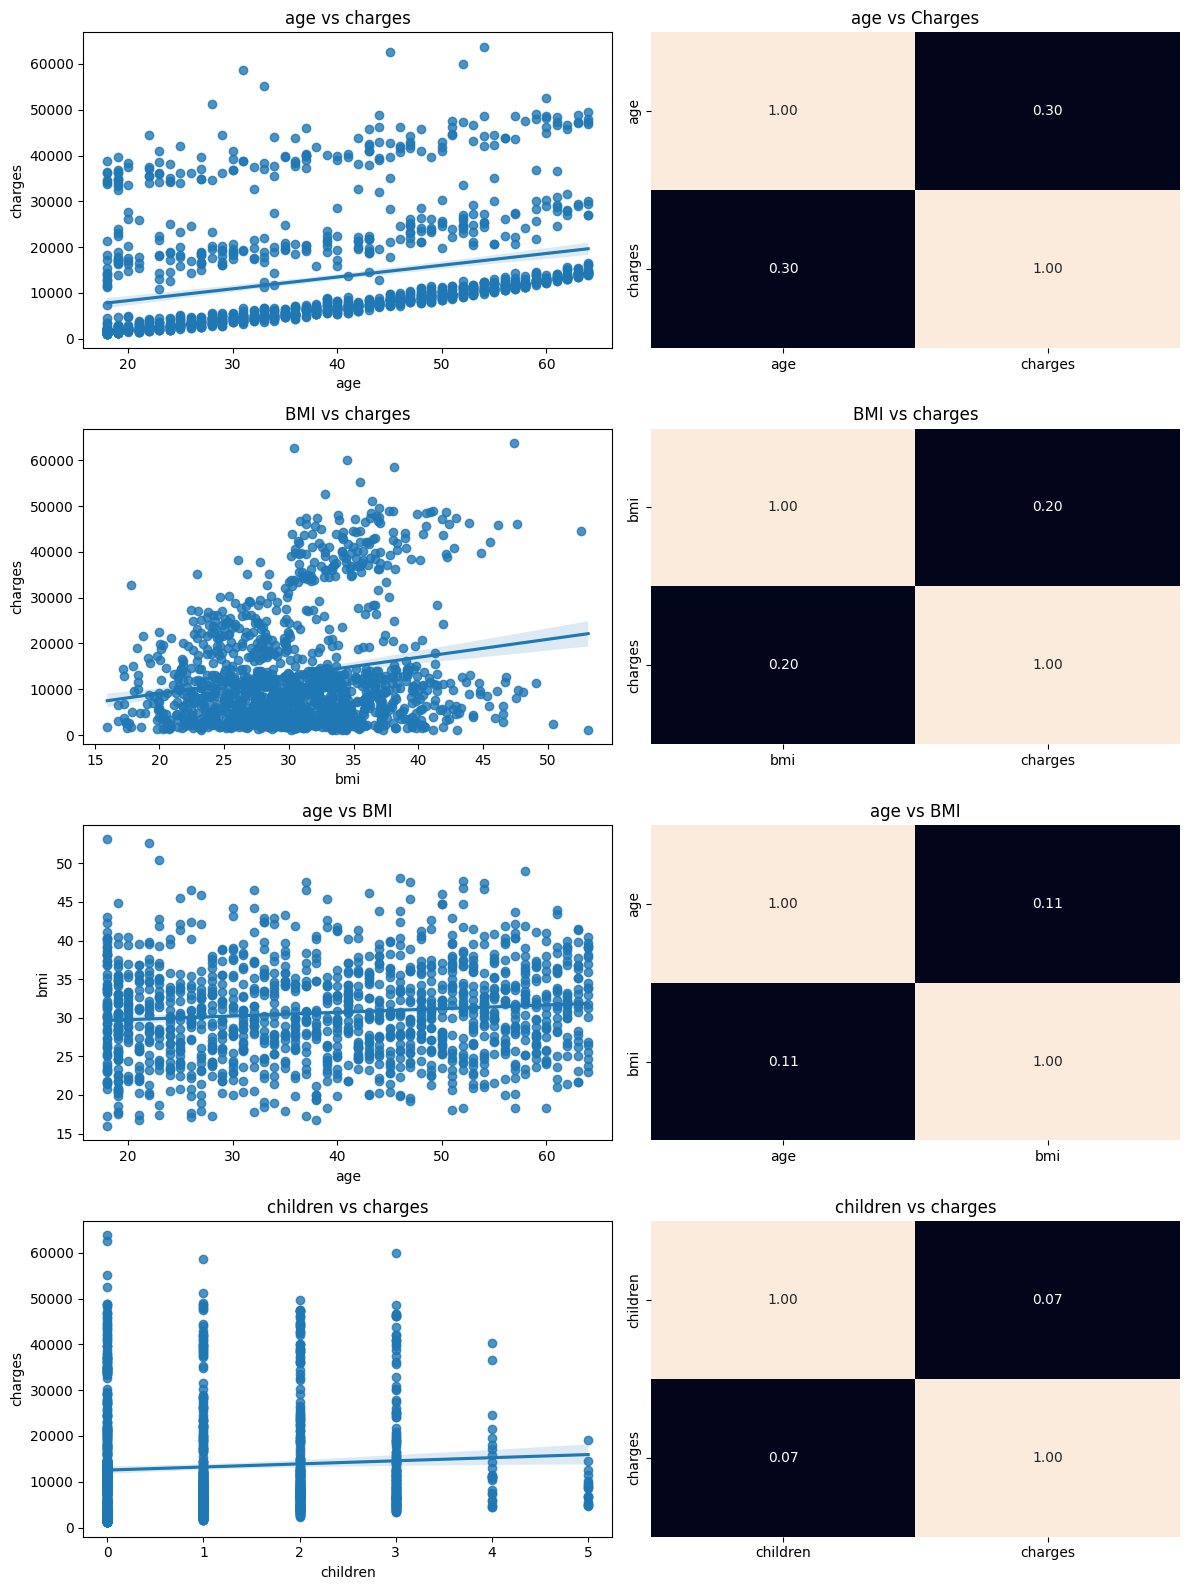

In [13]:
fig, axis = plt.subplots(4, 2, figsize=(12, 16))

#age vs charges
sns.regplot(ax=axis[0, 0], data=df, x="age", y="charges")
axis[0, 0].set_title("age vs charges")

sns.heatmap(df[["age", "charges"]].corr(), annot=True, fmt=".2f", ax=axis[0, 1], cbar=False)
axis[0, 1].set_title("age vs Charges")

#BMI vs charges
sns.regplot(ax=axis[1, 0], data=df, x="bmi", y="charges")
axis[1, 0].set_title("BMI vs charges")

sns.heatmap(df[["bmi", "charges"]].corr(), annot=True, fmt=".2f", ax=axis[1, 1], cbar=False)
axis[1, 1].set_title("BMI vs charges")

#age vs BMI
sns.regplot(ax=axis[2, 0], data=df, x="age", y="bmi")
axis[2, 0].set_title("age vs BMI")

sns.heatmap(df[["age", "bmi"]].corr(), annot=True, fmt=".2f", ax=axis[2, 1], cbar=False)
axis[2, 1].set_title("age vs BMI")

#children vs charges
sns.regplot(ax=axis[3, 0], data=df, x="children", y="charges")
axis[3, 0].set_title("children vs charges")

sns.heatmap(df[["children", "charges"]].corr(), annot=True, fmt=".2f", ax=axis[3, 1], cbar=False)
axis[3, 1].set_title("children vs charges")

plt.tight_layout()
plt.show()

Conclusions:

age vs charges: Older individuals tend to have higher medical expenses (moderate correlation of 0.30).

BMI vs charges: Higher BMI slightly increases medical costs (weak correlation of 0.20).

age vs BMI: Age and BMI show almost no relationship (correlation of 0.11).

children vs charges: Number of children has minimal impact on expenses (very weak correlation of 0.07).

### 4.2 Categorical - categorical analysis

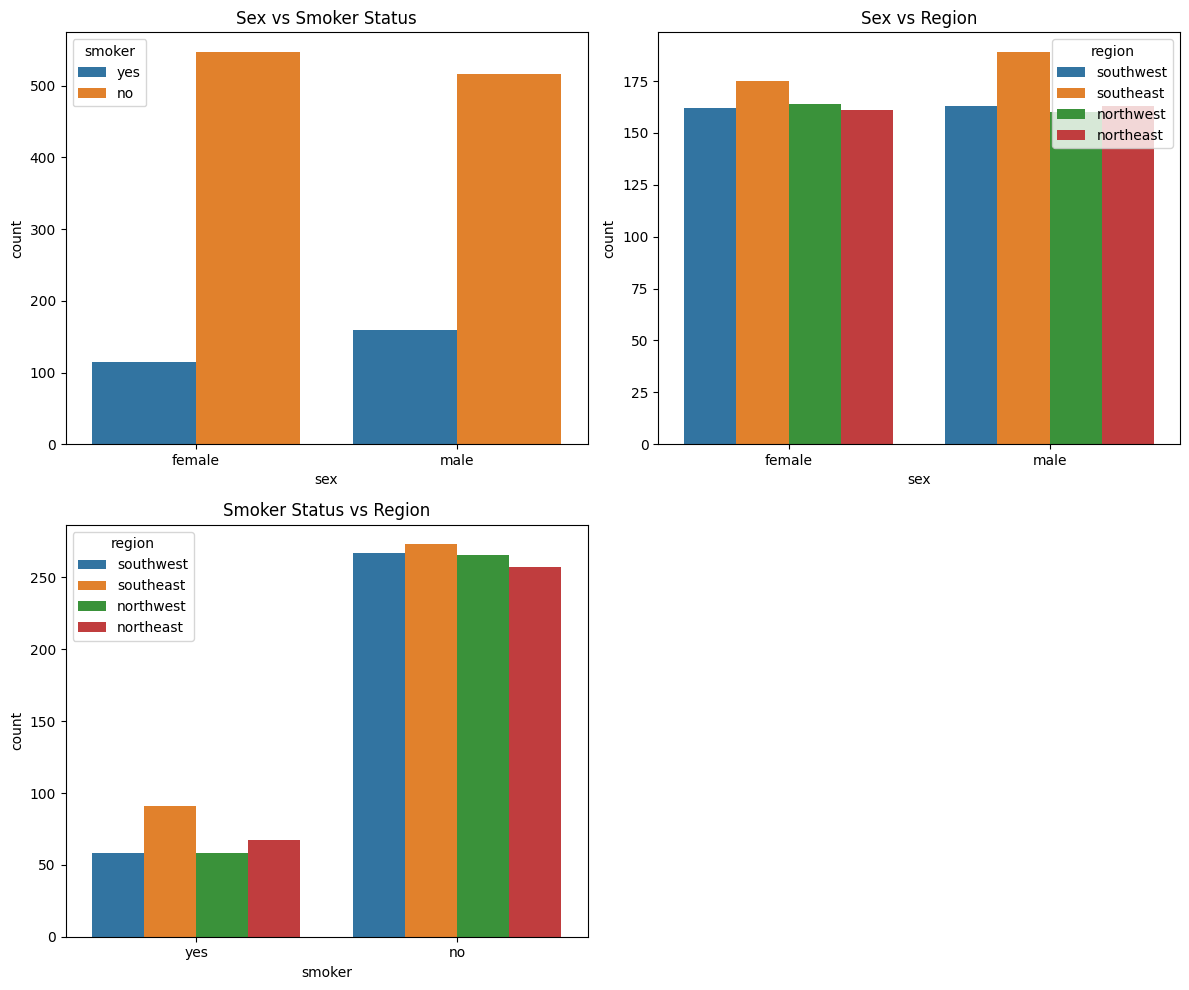

In [14]:
# Set up the figure with subplots
fig, axis = plt.subplots(2, 2, figsize=(12, 10))

# Sex vs Smoker
sns.countplot(ax=axis[0, 0], data=df, x="sex", hue="smoker")
axis[0, 0].set_title("Sex vs Smoker Status")

# Sex vs Region
sns.countplot(ax=axis[0, 1], data=df, x="sex", hue="region")
axis[0, 1].set_title("Sex vs Region")

# Smoker vs Region
sns.countplot(ax=axis[1, 0], data=df, x="smoker", hue="region")
axis[1, 0].set_title("Smoker Status vs Region")

fig.delaxes(axis[1, 1])

# Adjust layout
plt.tight_layout()
plt.show()

### 4.3 Other mixed analysis


### 4.4 Encoding Categorical Values and Saving JSON files

In [15]:
import json

sex_unique = list(df['sex'].unique())
sex_encoded = dict(zip(sex_unique, range(len(sex_unique))))
with open('./ENC/sex_encoded.json', 'w') as f:
    json.dump(sex_encoded, f)

smoker_unique = list(df['smoker'].unique())
smoker_encoded = dict(zip(smoker_unique, range(len(smoker_unique))))
with open('./ENC/smoker_encoded.json', 'w') as f:
    json.dump(smoker_encoded, f)

region_unique = list(df['region'].unique())
region_encoded = dict(zip(region_unique, range(len(region_unique))))
with open('./ENC/region_encoded.json', 'w') as f:
    json.dump(region_encoded, f)


In [18]:
df_encoded = df.copy()

#Multi-category encodings to the DataFrame
df_encoded['sex_encoded'] = df_encoded['sex'].map(sex_encoded)
df_encoded['smoker_encoded'] = df_encoded['smoker'].map(smoker_encoded)
df_encoded['region_encoded'] = df_encoded['region'].map(region_encoded)

df_encoded.drop(columns=['sex', 'smoker', 'region'], inplace=True)

df_encoded.head(3)

,age,bmi,children,charges,sex_encoded,smoker_encoded,region_encoded
0,19,27.90,0,16884.9240,0,0,0
1,18,33.77,1,1725.5523,1,1,1
2,28,33.00,3,4449.4620,1,1,1


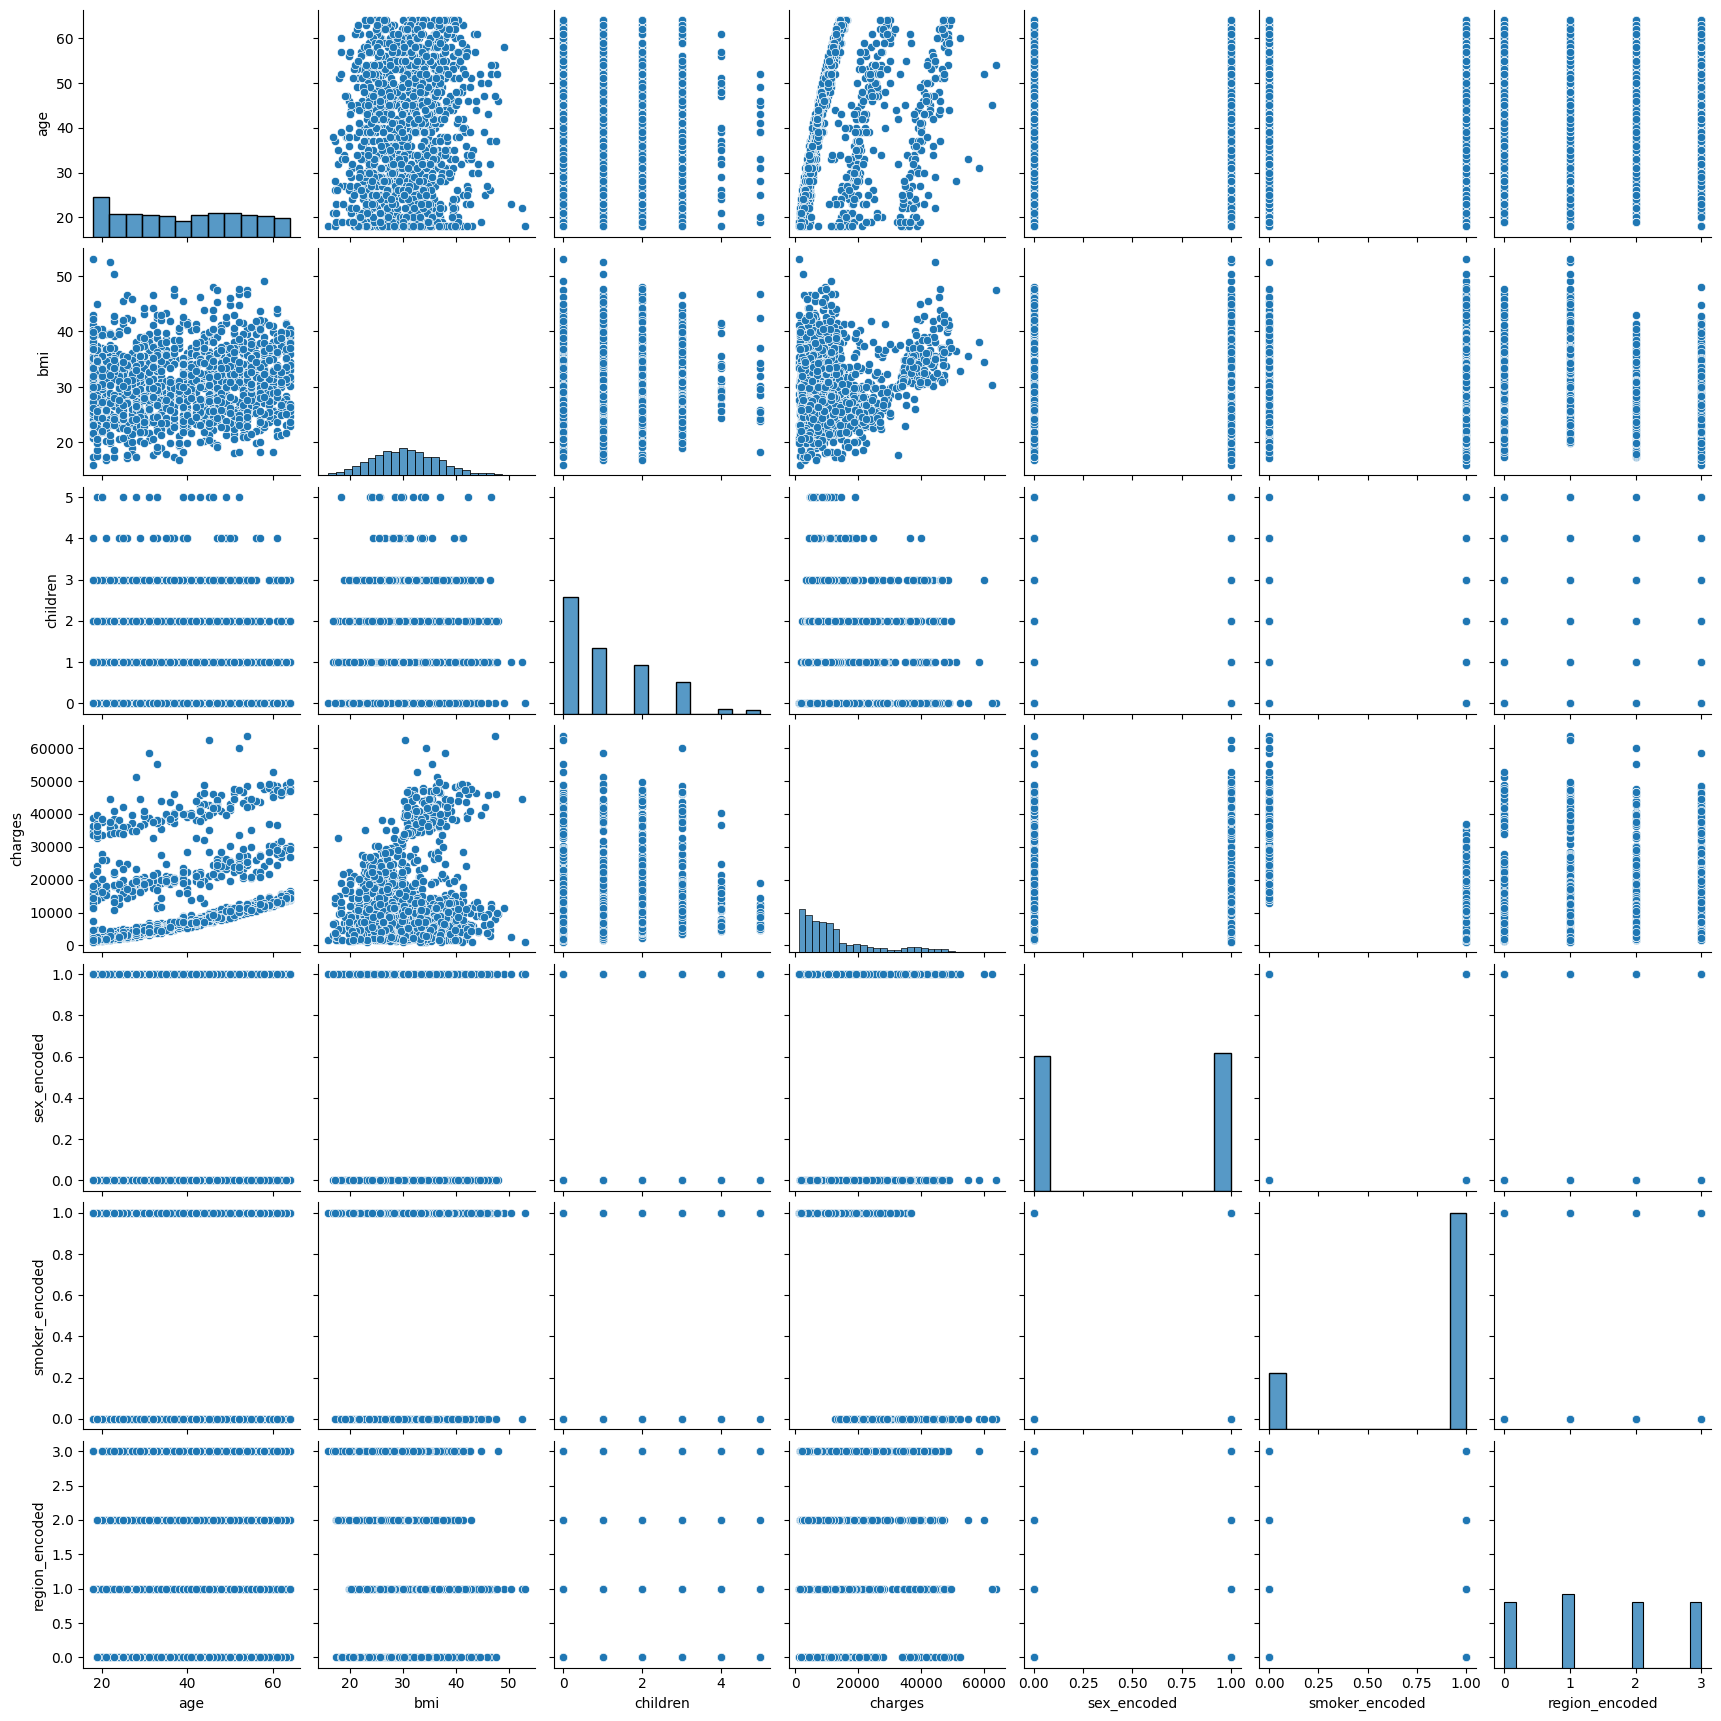

In [19]:
sns.pairplot(data=df_encoded)
plt.show()

### 4.5 Corr matrix

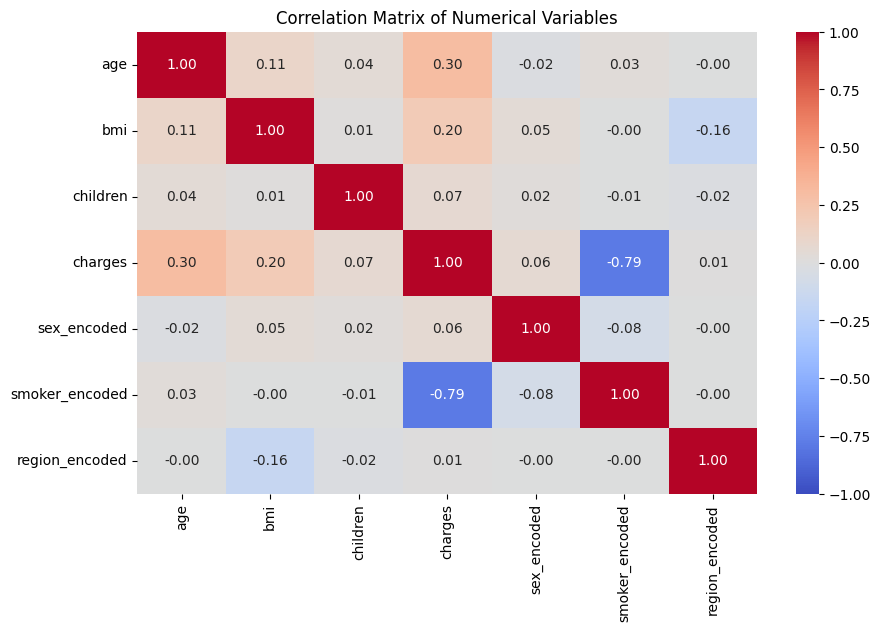

In [21]:
#Calculate the correlation matrix for numerical columns
correlation_matrix = df_encoded.corr()

#Plot the heatmap of the correlation matrix
plt.figure(figsize=(10, 6)) 
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix of Numerical Variables")
plt.show()

## 5. Feature Engineering 

In [22]:
df_encoded.describe()

,age,bmi,children,charges,sex_encoded,smoker_encoded,region_encoded
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487,0.504862,0.795064,1.483919
std,14.044333,6.100468,1.205571,12110.359656,0.500163,0.403806,1.105208
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000
25%,27.000000,26.290000,0.000000,4746.344000,0.000000,1.000000,1.000000
50%,39.000000,30.400000,1.000000,9386.161300,1.000000,1.000000,1.000000
75%,51.000000,34.700000,2.000000,16657.717450,1.000000,1.000000,2.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,3.000000


### 5.1 Outlier Analysis

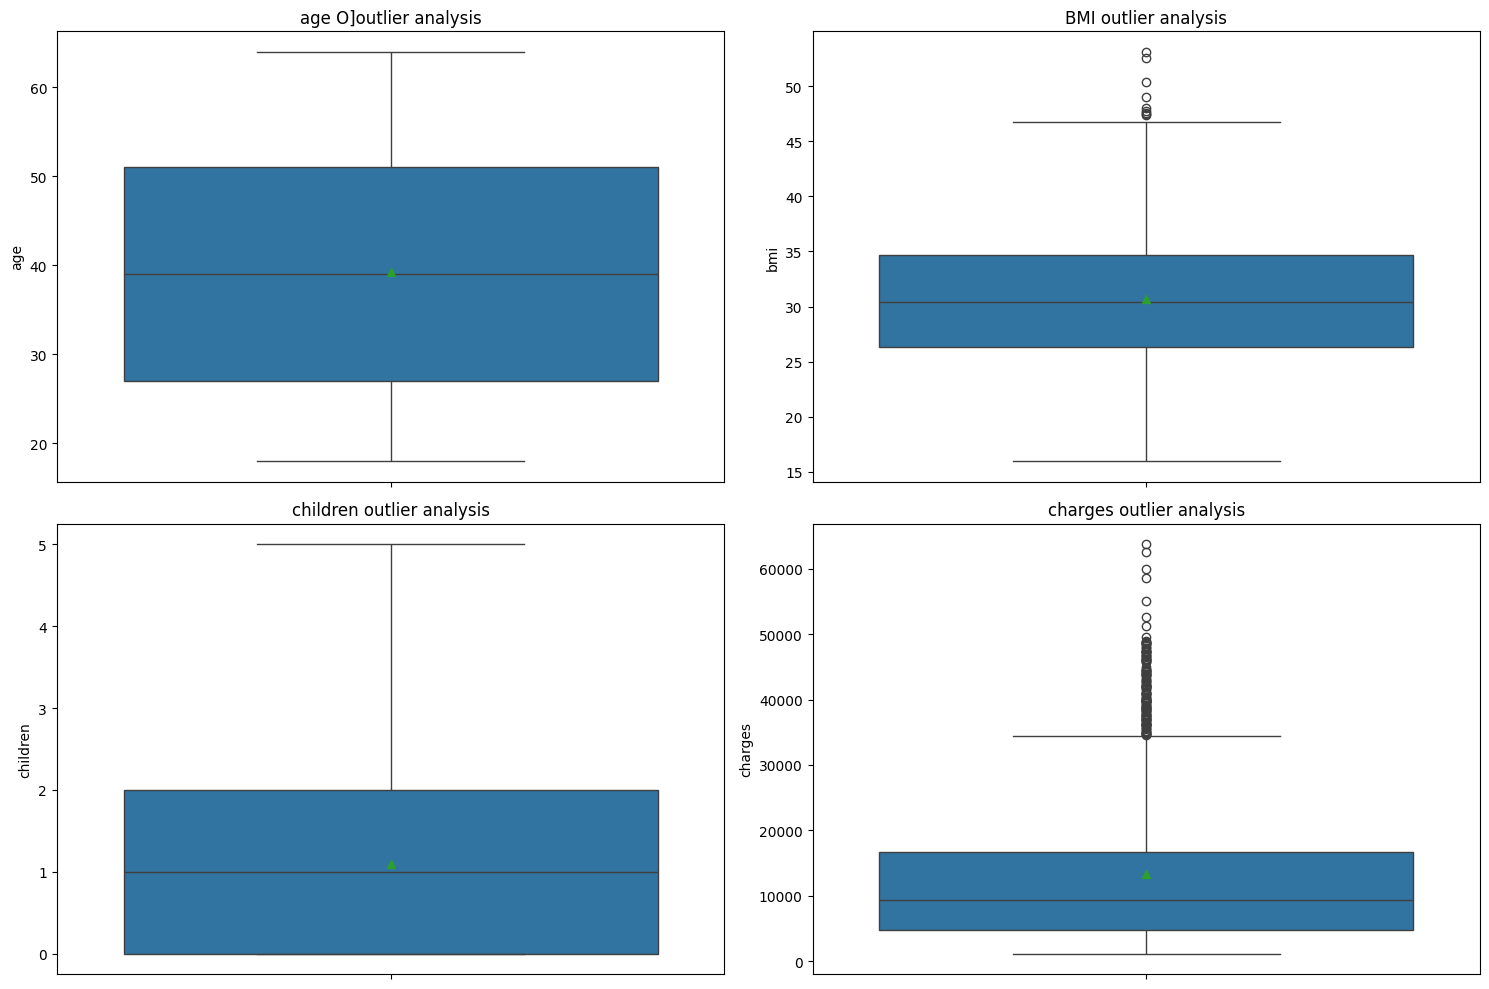

In [23]:
fig, axis = plt.subplots(2, 2, figsize=(15, 10))

sns.boxplot(ax=axis[0, 0], data=df_encoded, y="age", showmeans=True)
axis[0, 0].set_title("age O]outlier analysis")

sns.boxplot(ax=axis[0, 1], data=df_encoded, y="bmi", showmeans=True)
axis[0, 1].set_title("BMI outlier analysis")

sns.boxplot(ax=axis[1, 0], data=df_encoded, y="children", showmeans=True)
axis[1, 0].set_title("children outlier analysis")

sns.boxplot(ax=axis[1, 1], data=df_encoded, y="charges", showmeans=True)
axis[1, 1].set_title("charges outlier analysis")

plt.tight_layout()

In [24]:
df_encoded_no = df_encoded.copy()

def remove_outliers(x, feature_name, allow_neg=True):
    q1, q3 = x.quantile([0.25, 0.75])
    iqr = q3 - q1
    upper_lim = q3 + (iqr * 1.5)
    lower_lim = q1 - (iqr * 1.5) if allow_neg else max(0, q1 - (iqr * 1.5))

    x = x.apply(lambda val: upper_lim if (val > upper_lim) else (lower_lim if (val < lower_lim) else val))

    # Save the limits in a JSON file
    filename = f'./ENC/outliers_lims_{feature_name}.json'
    with open(filename, 'w') as f:
        json.dump({'upper_lim': upper_lim, 'lower_lim': lower_lim}, f)

    return x

In [25]:
df_encoded_no['bmi'] = remove_outliers(df_encoded_no['bmi'], 'bmi', allow_neg=False)
print(df_encoded_no[['bmi']].head())
df_encoded_no['charges'] = remove_outliers(df_encoded_no['charges'], 'charges', allow_neg=False)
print(df_encoded_no[['charges']].head())

      bmi
0  27.900
1  33.770
2  33.000
3  22.705
4  28.880
       charges
0  16884.92400
1   1725.55230
2   4449.46200
3  21984.47061
4   3866.85520


### 5.2 Missing Values

In [26]:
df_encoded.isna().sum()

age               0
bmi               0
children          0
charges           0
sex_encoded       0
smoker_encoded    0
region_encoded    0
dtype: int64

### 5.3 Split train/test of both Data Frames

In [27]:
# Define the split function
def split(target, df, test_size=0.2, random_state=123):
    X = df.drop(columns=target)
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test

In [28]:
# Dataframe with outliers
X_train_with_outliers, X_test_with_outliers, y_train, y_test = split('charges', df_encoded)

# Dataframe without outliers
X_train_without_outliers, X_test_without_outliers, _, _ = split('charges', df_encoded_no)

# Save the target variables for training and test sets
y_train.to_csv('../data/processed/y_train.csv', index=False)
y_test.to_csv('../data/processed/y_test.csv', index=False)

# Optionally, save X_train and X_test for both datasets if needed
X_train_with_outliers.to_csv('../data/processed/X_train_with_outliers.csv', index=False)
X_test_with_outliers.to_csv('../data/processed/X_test_with_outliers.csv', index=False)
X_train_without_outliers.to_csv('../data/processed/X_train_without_outliers.csv', index=False)
X_test_without_outliers.to_csv('../data/processed/X_test_without_outliers.csv', index=False)

### 5.4 Normalization

In [29]:
# Define the normalization function
def norm(X_train, X_test, reference: str):
    scaler = StandardScaler()
    scaler.fit(X_train)  # Fit the scaler on the training data
    
    # Transform the training set and convert back to DataFrame
    X_train_norm = scaler.transform(X_train)
    X_train_norm = pd.DataFrame(X_train_norm, index=X_train.index, columns=X_train.columns)
    
    # Transform the test set and convert back to DataFrame
    X_test_norm = scaler.transform(X_test)
    X_test_norm = pd.DataFrame(X_test_norm, index=X_test.index, columns=X_test.columns)

    # Save the fitted scaler for future use
    dump(scaler, open(f'./ENC/normalized_{reference}.sav', 'wb'))

    return X_train_norm, X_test_norm

In [30]:
X_train_with_outliers_norm, X_test_with_outliers_norm = norm(X_train_with_outliers, X_test_with_outliers, 'with_outliers')
X_train_without_outliers_norm, X_test_without_outliers_norm = norm(X_train_without_outliers, X_test_without_outliers, 'without_outliers')

### 5.5 Min-Max Scaling

In [31]:
# Define the Min-Max scaling function
def minmax(X_train, X_test, reference: str):
    scaler = MinMaxScaler()
    scaler.fit(X_train)  # Fit the scaler on the training data
    
    # Transform the training set and convert back to DataFrame
    X_train_minmax = scaler.transform(X_train)
    X_train_minmax = pd.DataFrame(X_train_minmax, index=X_train.index, columns=X_train.columns)
    
    # Transform the test set and convert back to DataFrame
    X_test_minmax = scaler.transform(X_test)
    X_test_minmax = pd.DataFrame(X_test_minmax, index=X_test.index, columns=X_test.columns)
    
    # Save the fitted scaler for future use
    dump(scaler, open(f'./ENC/minmax_{reference}.sav', 'wb'))

    return X_train_minmax, X_test_minmax

In [32]:
X_train_with_outliers_minmax, X_test_with_outliers_minmax = minmax(X_train_with_outliers, X_test_with_outliers, 'with_outliers')
X_train_without_outliers_minmax, X_test_without_outliers_minmax = minmax(X_train_without_outliers, X_test_without_outliers, 'without_outliers')

## 6. Feature Selection 

In [46]:
print("Unique values in y_train:", y_train.unique())

Unique values in y_train: [ 8603.8234   2585.269   11743.299   ...  2331.519   33475.81715
 18903.49141]


In [56]:
print("All-zero columns:", (X_train_with_outliers == 0).all())

All-zero columns: age               False
bmi               False
children          False
sex_encoded       False
smoker_encoded    False
region_encoded    False
dtype: bool


In [57]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_with_outliers_scaled = scaler.fit_transform(X_train_with_outliers)

In [58]:
scores, pvalues = f_classif(X_train_with_outliers_scaled, y_train)
print("Direct f_classif scores after scaling:", scores)
print("Direct f_classif p-values after scaling:", pvalues)

Direct f_classif scores after scaling: [nan nan nan nan nan nan]
Direct f_classif p-values after scaling: [nan nan nan nan nan nan]


/home/vscode/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:109: RuntimeWarning: invalid value encountered in divide
  msw = sswn / float(dfwn)


In [35]:
from sklearn.feature_selection import mutual_info_regression

#Run mutual_info_regression directly on the original data (without scaling)
mi_scores = mutual_info_regression(X_train_with_outliers, y_train)
mi_scores_series = pd.Series(mi_scores, index=X_train_with_outliers.columns)

print("Mutual Information Regression Scores:\n", mi_scores_series)

Mutual Information Regression Scores:
 age               1.406805
bmi               0.051091
children          0.141872
sex_encoded       0.117545
smoker_encoded    0.362090
region_encoded    0.091932
dtype: float64


In [36]:
#Feature selection function
def kselection(X_train, X_test, y_train, k, reference: str):
    selection_model = SelectKBest(mutual_info_regression, k=k)
    selection_model.fit(X_train, y_train)
    cols = selection_model.get_support()  
    
    X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns=X_train.columns[cols]) 
    X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns=X_test.columns[cols])
    
    dump(selection_model, open(f'./ENC/selection_model_{reference}.sav', 'wb'))
    
    return X_train_sel, X_test_sel


In [37]:

X_train_with_outliers_sel, X_test_with_outliers_sel = kselection(X_train_with_outliers, X_test_with_outliers, y_train, 3, 'with_outliers')
X_train_without_outliers_sel, X_test_without_outliers_sel = kselection(X_train_without_outliers, X_test_without_outliers, y_train, 3, 'without_outliers')

### 6.1 Applying the filter to the normalized and minmax scaled data frames

In [38]:
# Applying feature selection columns to the normalized data
X_train_with_outliers_norm_sel = X_train_with_outliers_norm[X_train_with_outliers_sel.columns]
X_train_without_outliers_norm_sel = X_train_without_outliers_norm[X_train_without_outliers_sel.columns]

X_test_with_outliers_norm_sel = X_test_with_outliers_norm[X_test_with_outliers_sel.columns]
X_test_without_outliers_norm_sel = X_test_without_outliers_norm[X_test_without_outliers_sel.columns]

# Applying feature selection columns to the Min-Max scaled data
X_train_with_outliers_minmax_sel = X_train_with_outliers_minmax[X_train_with_outliers_sel.columns]
X_train_without_outliers_minmax_sel = X_train_without_outliers_minmax[X_train_without_outliers_sel.columns]

X_test_with_outliers_minmax_sel = X_test_with_outliers_minmax[X_test_with_outliers_sel.columns]
X_test_without_outliers_minmax_sel = X_test_without_outliers_minmax[X_test_without_outliers_sel.columns]

### 6.2 Saving the CSV files

In [39]:
# Dictionary for training DataFrames
dfs_train = {
    'X_train_with_outliers_sel': X_train_with_outliers_sel,
    'X_train_without_outliers_sel': X_train_without_outliers_sel,
    'X_train_with_outliers_norm_sel': X_train_with_outliers_norm_sel,
    'X_train_without_outliers_norm_sel': X_train_without_outliers_norm_sel,
    'X_train_with_outliers_minmax_sel': X_train_with_outliers_minmax_sel,
    'X_train_without_outliers_minmax_sel': X_train_without_outliers_minmax_sel 
}

# Dictionary for testing DataFrames
dfs_test = {
    'X_test_with_outliers_sel': X_test_with_outliers_sel,
    'X_test_without_outliers_sel': X_test_without_outliers_sel,
    'X_test_with_outliers_norm_sel': X_test_with_outliers_norm_sel,
    'X_test_without_outliers_norm_sel': X_test_without_outliers_norm_sel,
    'X_test_with_outliers_minmax_sel': X_test_with_outliers_minmax_sel,
    'X_test_without_outliers_minmax_sel': X_test_without_outliers_minmax_sel    
}

# Save all training DataFrames to CSV files
for name, df in dfs_train.items():
    df.to_csv(f"../data/processed/{name}.csv", index=False)

# Save all testing DataFrames to CSV files
for name, df in dfs_test.items(): 
    df.to_csv(f'../data/processed/{name}.csv', index=False)

# Linear Regression Model

In [40]:
#Predictors and target variable
X_train = X_train_with_outliers_sel
X_test = X_test_with_outliers_sel
y_train = y_train
y_test = y_test

In [41]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

#Model parameters 
print(f"Intercept (a): {model.intercept_}")
print(f"Coefficients (b1, b2, ..., bn): {model.coef_}")

Intercept (a): 20673.215453379176
Coefficients (b1, b2, ..., bn): [   272.3835087     517.11415379 -23394.7075174 ]


In [42]:
# Predict the target variable on the test set
y_pred = model.predict(X_test)

#Predictions
print("Predictions on test set:", y_pred)

Predictions on test set: [ 4060.44278977 13021.44571312 27482.80317077  2998.56161858
 11714.83389683  7546.12267561  8718.61530118 10352.91635336
  7329.04489411 33392.28177128  4877.59331585 11687.18103324
  4877.59331585 12531.98442292 10352.91635336 26882.73042618
 13866.2491028  25576.1186099  32030.3642278   6511.89436802
 37805.7236376  14438.66898379  2453.79460119  7356.69775771
 26637.99978108 12449.02583213 13838.5962392  11359.49179735
  2970.90875498 38622.87416368  2181.41109249 10352.91635336
 13593.86559411  4905.24617945  8663.30957399 10897.68337075
 35599.00270444  6184.20513214 38839.95194518 25848.50211859
  7029.00852182  9180.42372779 26938.03615337 12531.98442292
  3815.71214467 33964.70165226 11170.06687944 28489.37861476
  7273.73916692 13538.55986691 13621.5184577  28027.57018816
 33419.93463487  9235.72945498 13538.55986691 13538.55986691
  2453.79460119 13210.87063103 36388.50036693 15717.62793648
  2998.56161858 14438.66898379 33719.97100716  9780.49647237

In [43]:
from sklearn.metrics import mean_squared_error, r2_score

#Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Coefficient of Determination (R^2): {r2}")

Mean Squared Error (MSE): 35816410.24718268
Coefficient of Determination (R^2): 0.7682749525357777


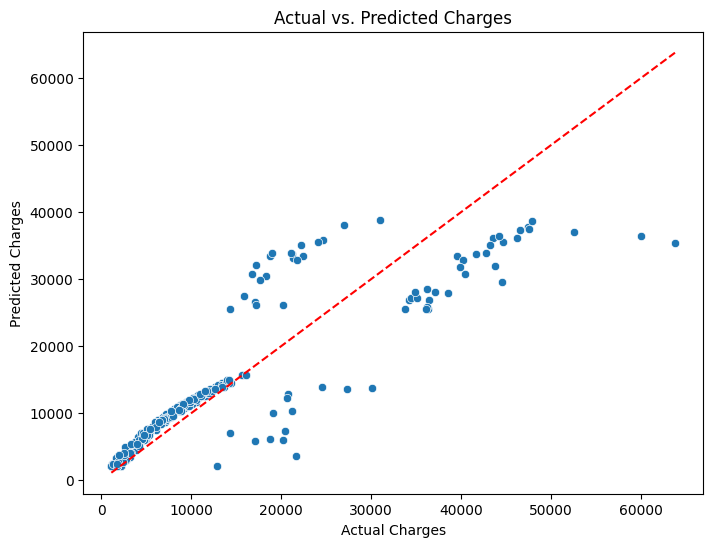

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')  # Identity line
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs. Predicted Charges")
plt.show()